### Bike Sharing - Multiple Linear Regression
The objective is to model the demand for shared bikes with the available independent variables.Create a linear model that describe the effect of various features on demand.

#### There will be 5 Steps in this Analysis
* Step 1 - Reading , Understanding and Visualising the Data
* Step 2 - Preparing the data for Data Modelling
* Step 3 - Training the Model/Models & Evaluation
* Step 4 - Residual Analysis
* Step 5 - Predictions & Evaluation on the Test Data 

In [1]:
# importing all the libraries we wanted for this analysis
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pylab 
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

#### Step 1 - Reading , Understanding and Visualising the Data

In [51]:
# reading the dataset
bikeSharing = pd.read_csv('day.csv')

In [52]:
# this is how the dataset looks like
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [53]:
# we have 730 rows and 16 columns
bikeSharing.shape

(730, 16)

In [5]:
bikeSharing.info()  # no null values in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<AxesSubplot:>

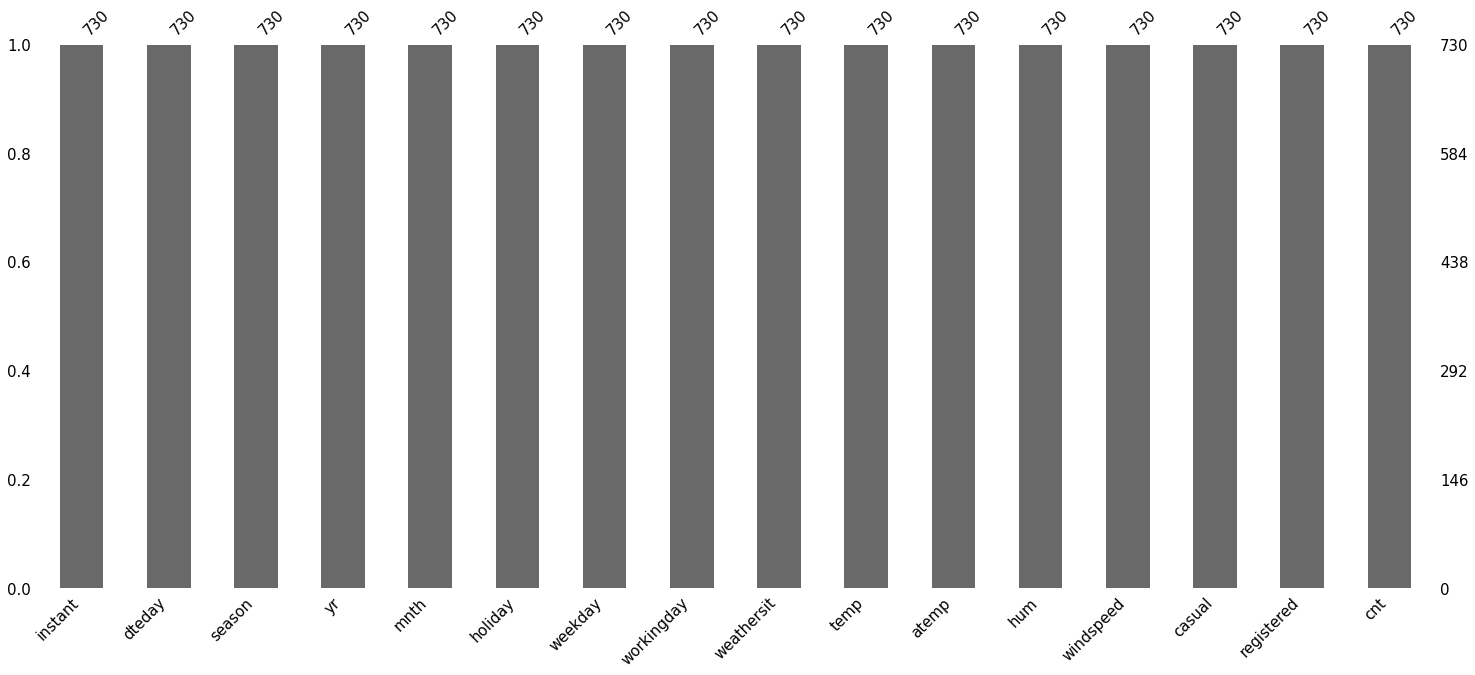

In [6]:
msno.bar(bikeSharing , sort = 'ascending' , fontsize=15) #visualisation of no missing values

In [6]:
bikeSharing.columns #name of the columns in our bike sharing dataset

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [54]:
# Renaming few columns for better understanding
bikeSharing = bikeSharing.rename(columns = {'yr' : 'year' , 'mnth' : 'month' , 'hum' : 'humidity','cnt':'count'})

In [55]:
# no duplicates
bikeSharing = bikeSharing.drop_duplicates()
bikeSharing.shape

(730, 16)

In [17]:
# This is the Data Dictionary provided
with open ('Readme.txt') as f:
    lines = f.read()
    print(lines)

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

In [56]:
# Using the Data dictionary we have mapped categorical variables to their names for better EDA and understanding
bikeSharing['season'] = bikeSharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikeSharing['weathersit'] = bikeSharing['weathersit'].map({1:'Clear, Partly cloudy', 2:'Mist & Cloudy', 3:'Light Rain/Snow & Scattered clouds', 4:'Heavy Rain, Snow & Fog'})
bikeSharing['weekday'] = bikeSharing['weekday'].map({0: 'Monday' , 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday' , 6 : 'Sunday'})
bikeSharing['month'] = bikeSharing['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [57]:
bikeSharing.head(3)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Monday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Tuesday,1,"Clear, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349


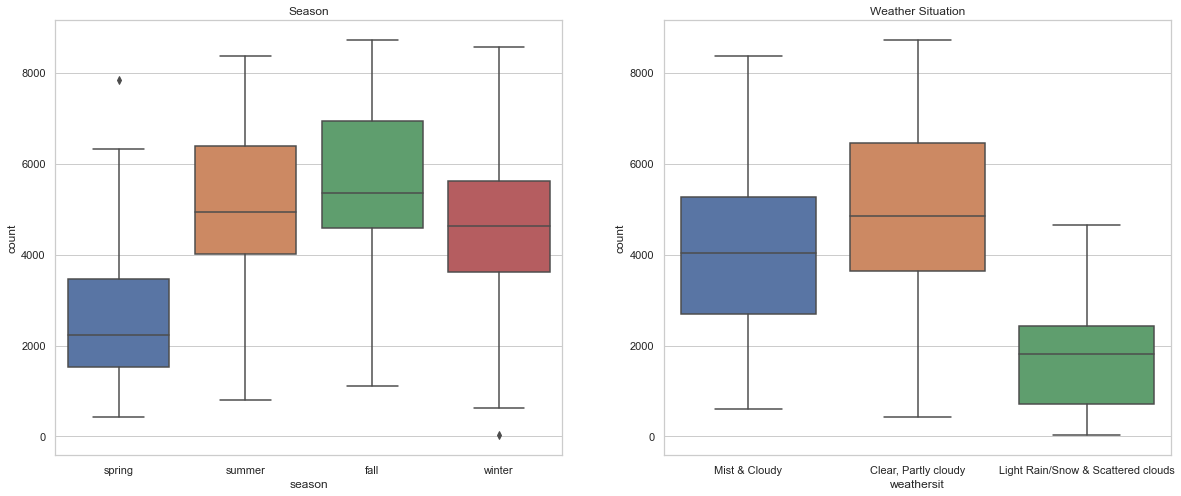

In [58]:
plt.figure(figsize=(20,8))
sns.set_theme(style = 'whitegrid')
plt.subplot(1,2,1)
sns.boxplot(x = 'season' , y = 'count' , data = bikeSharing)
plt.title('Season')
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit' , y = 'count' , data = bikeSharing)
plt.title('Weather Situation')
plt.show()

* The 1st Visual tells us about the Distribution of Season with respect to total count of bike share and it seems that 'fall' season has the most number of counts then any other season, spring being the least favourite season for bike sharing.
* 2nd Visual is for the distribution of Weather with respect to total count and when the weather is clear/Partly cloudly thats when bike sharing count is the most and least being for weather with Snow and Rain which makes sense as well.

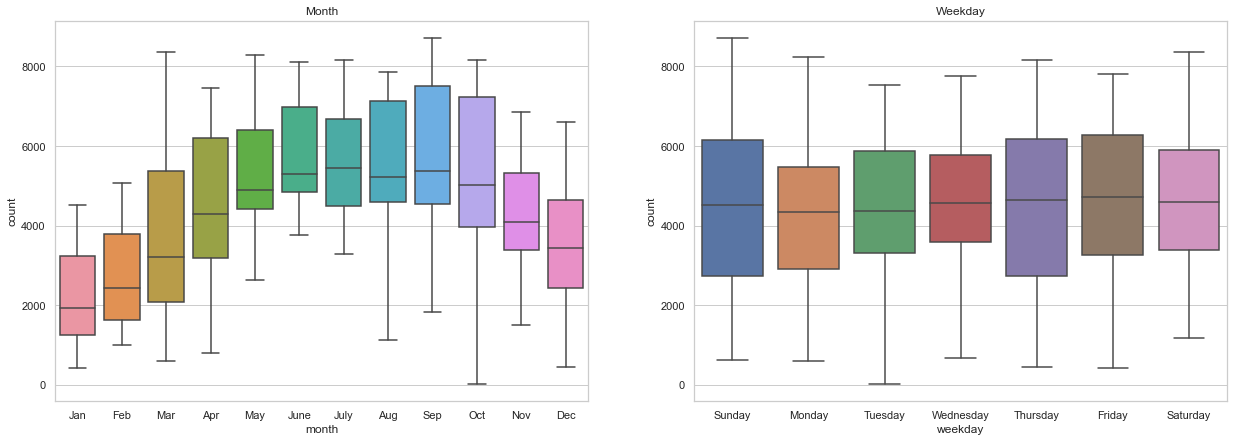

In [13]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
sns.boxplot(x = 'month' , y = 'count' , data = bikeSharing)
plt.title('Month')
plt.subplot(1,2,2)
sns.boxplot(x = 'weekday' , y = 'count' , data = bikeSharing)
plt.title('Weekday')
plt.show()

* The 1st Visual tells us about the Distribution of the months with respect to total count of bike share and as we can see that the business starts picking from the very first month of January and from June to October bike sharing is the most with September month being most popular, as we have already seen fall season having the most bike sharing counts. After october there is a dip towards the end of a year because thats when winter starts as well.
* 2nd Visual is for the distribution of Weekday with respect to total count and mostly the visual seems almost same for all the days with Friday & Sunday having more counts.

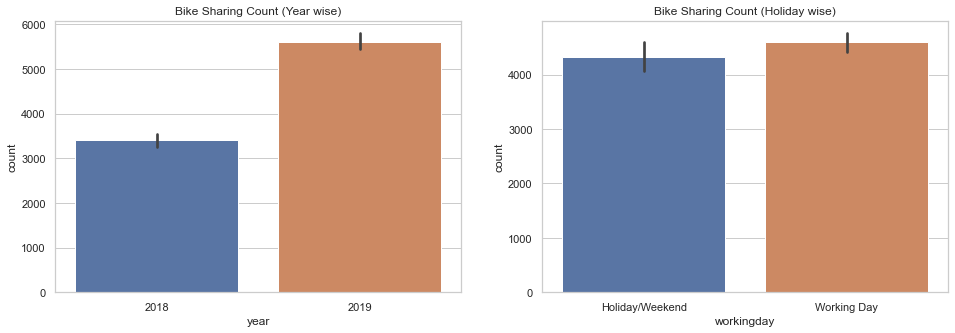

In [78]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x = 'year' , y= 'count' ,data= bikeSharing)
plt.xticks([0,1],['2018','2019'])
plt.title('Bike Sharing Count (Year wise)')
plt.subplot(1,2,2)
sns.barplot(x = 'workingday' , y= 'count' ,data= bikeSharing)
plt.xticks([0,1],['Holiday/Weekend','Working Day'])
plt.title('Bike Sharing Count (Holiday wise)')
plt.show()

* In the 1st Visual we can clearly see that how the business jumps up from 2018 to 2019 in terms of bike sharing total counts
* 2nd visual shows us that Count on a working day is more than a Holiday or if its a weekend

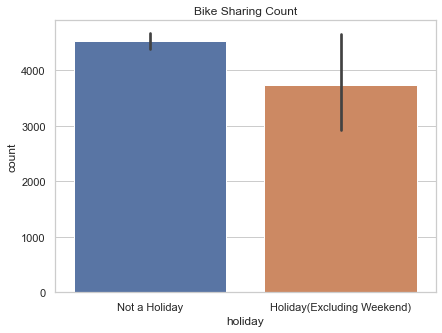

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x = 'holiday' , y= 'count' ,data= bikeSharing)
plt.xticks([0,1],['Not a Holiday','Holiday(Excluding Weekend)'])
plt.title('Bike Sharing Count')
plt.show()

The Visual above gives us an insight that usually bike sharing count is more when its not a Holiday, it can be a weekday or weekend but bike sharing count drops on Holidays.

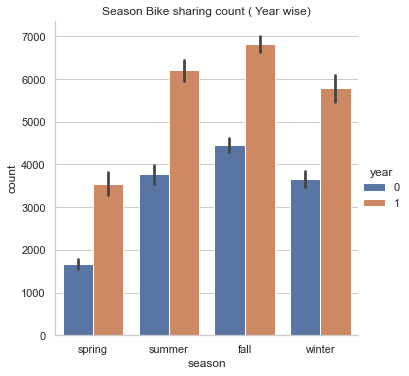

In [15]:
sns.catplot(x = 'season' , y='count' , data=bikeSharing , kind='bar' , hue='year')
plt.title('Season Bike sharing count ( Year wise)')
plt.show()

* Both years 2018 and 2019 seems to follow the same pattern with 'fall' having the most number of bike sharing counts and then followed by summer , winter and least being spring

In [16]:
bikeSharing.describe()

,instant,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


The table above gives us details of all the numerical columns in the dataset and displays summary statistics for a dataframe It displays count, mean(average), standard deviation, minimum and maximum value present in that column and percentiles(25%,50% & 75%) which is 1st quartile(Q1),meadian(50%) and 3rd quartile(Q3) so this insight can also help us to understand the spread of the data.

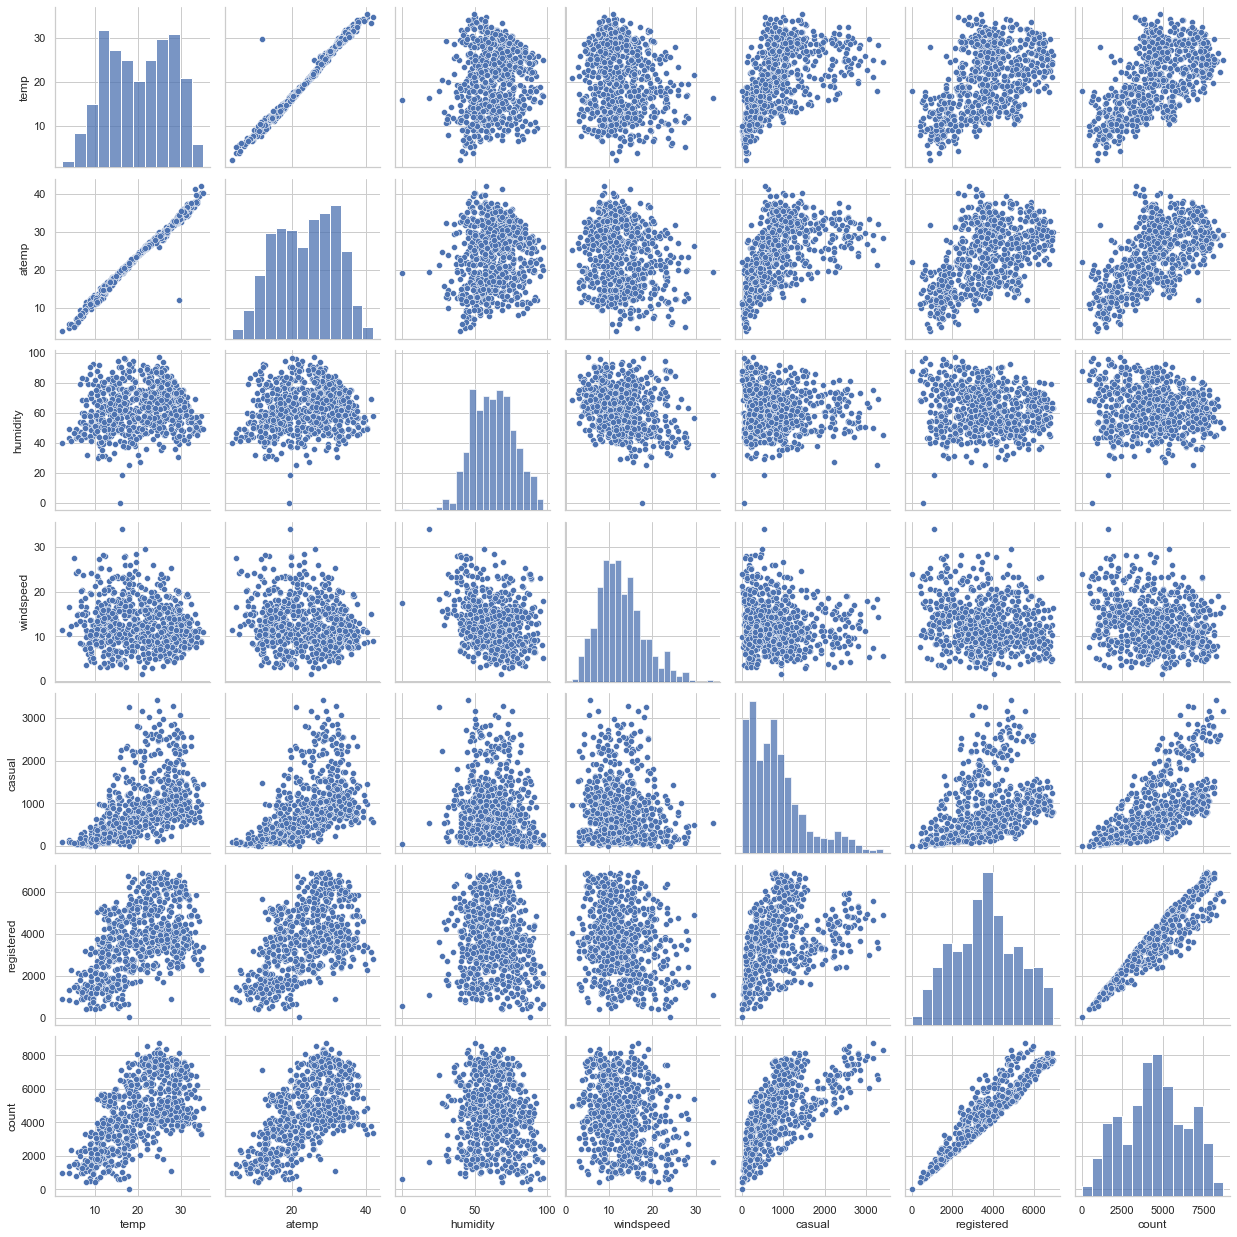

In [17]:
sns.pairplot(bikeSharing , vars = ['temp' , 'atemp','humidity','windspeed' , 'casual' , 'registered','count'])
plt.show()

* The above visual is a pairplot, which plot's a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column
* We can see all the numerical variables and there relationship with other variables. Now as the visual suggests 'temp' & 'atemp' are strongly correlated to each other and registered also has a strong linear relationship with total count as well.

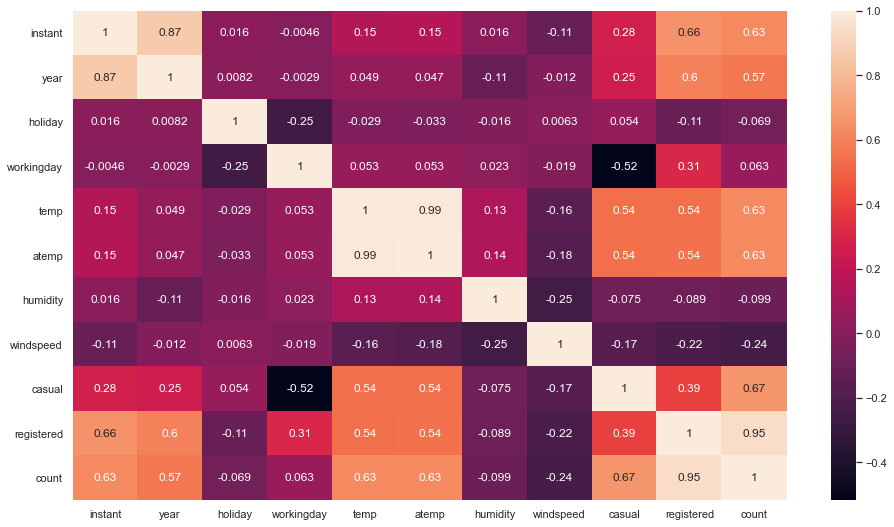

In [18]:
plt.figure(figsize = (16,9))
sns.heatmap(bikeSharing.corr() , annot = True)
plt.show()

* The heat map above shows us the correlation values related to two specific variables. The correlation ranges from +1 to -1. As we saw 'atemp' and 'temp' having a strong relationship in pairplot here we can see that the correlation between them is 0.99.Hence both carry the same information and either of them can be used not both.

#### Step 2 - Preparing the data for Data Modelling


* 'instant' column  - just index numbers (record index), wont be helpful while building a model
* 'dteday' column - date, we already have 'year','month' and 'weekday' columns so we can drop dteday column
* 'casual' , 'registered' - count of casual and registered users. we already have a column 'count' column which is a total count of bikes so we can drop these two columns

In [9]:
bikeSharing = bikeSharing.drop(['instant' , 'casual' , 'registered','dteday'] , axis = 1)

In [10]:
# 'atemp' dropped as we are keeping 'temp' column for this analysis. We saw how strongly correlated they are.
bikeSharing = bikeSharing.drop('atemp' , axis=1)

In [11]:
bikeSharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Monday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Tuesday,1,"Clear, Partly cloudy",8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Wednesday,1,"Clear, Partly cloudy",8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Thursday,1,"Clear, Partly cloudy",9.305237,43.6957,12.522300,1600


In [12]:
# Now we need to convert Categorical variables to Numeric variables for which we will use dummy variable function
month = pd.get_dummies(data = bikeSharing['month'] , drop_first = True)
weekday = pd.get_dummies(data = bikeSharing['weekday'] , drop_first = True)
weathersit = pd.get_dummies(data = bikeSharing['weathersit'] , drop_first = True)
season = pd.get_dummies(data = bikeSharing['season'] , drop_first = True)
bikeSharing = pd.concat([bikeSharing,month, weekday, weathersit, season],axis = 1)

In [13]:
# As we have dummy variable columns we can drop these categorical features
bikeSharing = bikeSharing.drop(columns = ['season','month','weekday','weathersit'] ,axis=1)

In [14]:
# Splitting the data into train and test. We will use train data to train our model and test it on out test data
df_train , df_test = train_test_split(bikeSharing , train_size = 0.7 , random_state = 100)

train_size = 0.7 means thats 70% of the data will be given to train and the remaining 30% data will be our unseen test data to test the model later

In [15]:
df_train.shape #training data has 510 rows and 29 features

(510, 29)

In [16]:
df_test.shape #test data has 220 rowa and 29 featues

(220, 29)

In [17]:
numericVars = ['temp', 'humidity', 'windspeed', 'count'] #numeric varibales we need to re-scale

scaler = MinMaxScaler()

df_train[numericVars] = scaler.fit_transform(df_train[numericVars])

* Before we train our model we need to Rescale our numeric independent variables to normalize the data within a particular range. It also helps in speeding up the calculations in an algorithm.
* Most of the times, collected data set contains features highly varying in magnitudes, units and range. If scaling is not done then algorithm only takes magnitude in account and not units hence incorrect modelling. To solve this issue, we have to do scaling to bring all the variables to the same level of magnitude.
* Here we have used MinMax Scalar which will bring all the numeric variables to the scale of 0 to 1
* Formula for MinMaxScalar is :
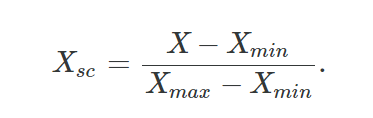

#### Step 3 - Training the Model/Models & Evaluation

In [18]:
y_train = df_train.pop('count')
X_train = df_train

* X_train consists of all the independent variables
* y_train will have the dependent variable

In [19]:
X_train_sm = sm.add_constant(X_train)

When we use statsmodels library for linear regression we need to add constant (intercept) to our equation.

In [20]:
lr = sm.OLS(y_train , X_train_sm)

* OLS stands for Ordinary Least Squares in the equation above.

In [21]:
lr_model = lr.fit() #fitting the model

In [22]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          3.00e-181
Time:                        15:42:52   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2395      0.035      6.768      0.000       0.170       0.309
year                                   0.2324      0.008     28.819      0.000       0.217       0.248
holiday                                0.0046      0.024      0.190      0.849      -0.043       0.052
workingday                             0.0907      0.012      7.329      0.000       0.066       0.115
temp                                   0.4454      0.046      9.628      0.000       0.354       0.536
humidity                              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                             -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug                                    0.0204      0.034      0.607      0.544      -0.046       0.086
Dec                                   -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb                                   -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan                                   -0.0633      0.034     -1.885      0.060      -0.129       0.003
July                                  -0.0338      0.035     -0.969      0.333      -0.102       0.035
June                                   0.0046      0.025      0.186      0.853      -0.044       0.053
Mar                                    0.0013      0.025      0.052      0.959      -0.047       0.050
May                                    0.0247      0.021      1.173      0.241      -0.017       0.066
Nov                                   -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct                                    0.0075      0.036      0.210      0.834      -0.063       0.078
Sep                                    0.0859      0.032      2.692      0.007       0.023       0.149
Monday                                 0.0450      0.014      3.253      0.001       0.018       0.072
Saturday                               0.0091      0.016      0.588      0.557      -0.021       0.040
Sunday                                 0.0992      0.014      7.292      0.000       0.072       0.126
Thursday                               0.0036      0.015      0.248      0.804      -0.025       0.032
Tuesday                               -0.0118      0.015     -0.780      0.436      -0.042       0.018
Wednesday                             -0.0088      0.015     -0.571      0.568      -0.039       0.022
Light Rain/Snow & Scattered clouds    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist & Cloudy                         -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring                                -0.0448      0.030     -1.496      0.135      -0.104      

* This is a summary statistics above  for a linear model where we took all the variables in consideration and built a model. 
* We need to look at two values while considering a model good enough. p-Value of the predictor variables and second is Multicollinearity of predictors with each other which we can calculate using VIF.
* Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.
* Generally if p-Value > 0.05 for a variable then it is considered insignificant for that model.
* VIF  > 5 or 10 (depends on study) is high multicollinearity of that specific variable with others and hence such variables become redunctant for the model and can be removed.
* We will also check R-squared. R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 
* R-squared ranges from 0-1 or 0-100%

In [23]:
def VIF(data):
    vif = pd.DataFrame()
    vif['features'] = data.columns
    vif['vif'] = [variance_inflation_factor(data.values , i ) for i in range(len(data.columns))]
    vif = vif.sort_values(by = 'vif' , ascending = False)
    return vif

This is a function we have created to check Multicollinearity in each linear model we will create with the help of VIF 

In [24]:
VIF(X_train)

,features,vif
2,workingday,86.404832
19,Sunday,19.706128
17,Monday,18.340780
25,spring,10.747592
27,winter,9.441343
26,summer,8.265165
3,temp,7.084168
14,Nov,6.788097
15,Oct,6.466548
6,Aug,6.358198


* As said earlier we can see that p-Value and VIF value for many variables are above the threshold considered and hence we can go ahead and remove those variables.
* Taking all variables, building a model and then removing one variable at a time looking at their p-Value and VIF is called Backward Approach which becomes tideous as well becuase of so many predictors hence now we will use an automatic approach RFE which is Recursive Feature Elimination which helps us to identify top 'n' features in a dataset provided and then we will mix it with our manual approach if we need to drop more predictors after RFE

#### Using Automatic Approach Recursive Feature Elimination (RFE)
* ref.support_  - returns an array with boolean values to indicate whether an attribute was selected using RFE e.g [False True True True]
* ref.ranking_  - returns an array with positive integer values to indicate the attribute ranking with a lower score indicating a higher ranking e.g. [2 1 1 1 3 4]

In [25]:
# creating a linear regression object
linear = LinearRegression()

In [26]:
linear.fit(X_train , y_train)

LinearRegression()

In [27]:
# fitting the linear model to RFE and also taking top 15 features from the data
rfe = RFE(linear , 15)

In [28]:
rfe = rfe.fit(X_train , y_train)

In [29]:
list(zip(X_train.columns , rfe.support_ , rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 12),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 11),
 ('Sunday', True, 1),
 ('Thursday', False, 14),
 ('Tuesday', False, 8),
 ('Wednesday', False, 10),
 ('Light Rain/Snow & Scattered clouds', True, 1),
 ('Mist & Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [30]:
# selecting only those columns which rfe_support suggested
columns  = X_train.columns[rfe.support_]

In [31]:
X_train_rfe = X_train[columns]

In [32]:
X_train_rfe.head()

,year,holiday,workingday,temp,humidity,windspeed,July,Sep,Monday,Sunday,Light Rain/Snow & Scattered clouds,Mist & Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0


In [33]:
X_train_sm  = sm.add_constant(X_train_rfe) #adding a constant

In [34]:
linearModel_1 = sm.OLS(y_train, X_train_sm).fit()
linearModel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          2.11e-191
Time:                        15:43:14   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1995      0.028      7.200      0.000       0.145       0.254
year                                   0.2298      0.008     28.647      0.000       0.214       0.246
holiday                               -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday                             0.0837      0.010      8.665      0.000       0.065       0.103
temp                                   0.5277      0.033     15.884      0.000       0.462       0.593
humidity                              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                             -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July                                  -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep                                    0.0820      0.017      4.966      0.000       0.050       0.114
Monday                                 0.0406      0.012      3.315      0.001       0.017       0.065
Sunday                                 0.0937      0.012      8.040      0.000       0.071       0.117
Light Rain/Snow & Scattered clouds    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist & Cloudy                         -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring                                -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer                                 0.0537      0.015      3.631      0.000       0.025       0.083
winter                                 0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     2.82e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.9e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
VIF(X_train_rfe)

,features,vif
2,workingday,50.682453
9,Sunday,12.199068
8,Monday,11.786901
12,spring,5.019137
3,temp,3.616501
14,winter,3.485532
1,holiday,2.907903
13,summer,2.621807
4,humidity,1.906322
11,Mist & Cloudy,1.568983


* If we look at the p-Value of the predictors there are variables having p-Value above 0.05 and looking at multicollinearity(VIF) of these predictors tell us that there are variables having high VIF as well.
* We will drop 'holiday' column as it has high p-Value of 0.386

In [36]:
X_train_rfe_v2 = X_train_rfe.drop('holiday' ,axis=1)
X_train_sm = sm.add_constant(X_train_rfe_v2)
linearModel_2 = sm.OLS(y_train,X_train_sm).fit()
linearModel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          2.11e-191
Time:                        15:43:31   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1811      0.042      4.301      0.000       0.098       0.264
year                                   0.2298      0.008     28.647      0.000       0.214       0.246
workingday                             0.1021      0.025      4.024      0.000       0.052       0.152
temp                                   0.5277      0.033     15.884      0.000       0.462       0.593
humidity                              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                             -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July                                  -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep                                    0.0820      0.017      4.966      0.000       0.050       0.114
Monday                                 0.0591      0.027      2.192      0.029       0.006       0.112
Sunday                                 0.1121      0.027      4.181      0.000       0.059       0.165
Light Rain/Snow & Scattered clouds    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist & Cloudy                         -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring                                -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer                                 0.0537      0.015      3.631      0.000       0.025       0.083
winter                                 0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
VIF(X_train_rfe_v2)

,features,vif
3,humidity,32.104544
2,temp,18.988963
1,workingday,18.410410
8,Sunday,4.908499
4,windspeed,4.905201
11,spring,4.799573
7,Monday,4.762488
13,winter,3.691681
12,summer,3.040142
10,Mist & Cloudy,2.309503


* In Linear Model 2 we still have variables with little high p-value and VIF value as well.
* Now if we notice and by dropping 'holiday' VIF for few variables significantly dropped.
* 'Monday' seems to have high p-Value than others of 0.029, hence we will drop it 

In [38]:
X_train_rfe_v3 = X_train_rfe_v2.drop('Monday' ,axis=1)
X_train_sm  = sm.add_constant(X_train_rfe_v3)
linearModel_3 = sm.OLS(y_train, X_train_sm).fit()
linearModel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          1.54e-191
Time:                        15:43:41   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2307      0.036      6.472      0.000       0.161       0.301
year                                   0.2300      0.008     28.568      0.000       0.214       0.246
workingday                             0.0518      0.011      4.764      0.000       0.030       0.073
temp                                   0.5278      0.033     15.827      0.000       0.462       0.593
humidity                              -0.1594      0.037     -4.253      0.000      -0.233      -0.086
windspeed                             -0.1815      0.026     -7.114      0.000      -0.232      -0.131
July                                  -0.0535      0.018     -2.946      0.003      -0.089      -0.018
Sep                                    0.0799      0.017      4.831      0.000       0.047       0.112
Sunday                                 0.0619      0.014      4.420      0.000       0.034       0.089
Light Rain/Snow & Scattered clouds    -0.2442      0.026     -9.330      0.000      -0.296      -0.193
Mist & Cloudy                         -0.0561      0.010     -5.379      0.000      -0.077      -0.036
spring                                -0.0566      0.021     -2.740      0.006      -0.097      -0.016
summer                                 0.0541      0.015      3.640      0.000       0.025       0.083
winter                                 0.0983      0.017      5.738      0.000       0.065       0.132
==============================================================================
Omnibus:                       71.537   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.647
Skew:                          -0.709   Prob(JB):                     1.32e-40
Kurtosis:                       5.576   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
VIF(X_train_rfe_v3)

,features,vif
3,humidity,28.378739
2,temp,16.878299
1,workingday,4.715719
4,windspeed,4.700597
10,spring,4.175178
12,winter,3.387529
11,summer,2.840619
9,Mist & Cloudy,2.282039
0,year,2.080059
7,Sunday,1.836324


* In Linear Model 3 if we noticed that with dropping variables VIF Value is significantly decresing but for couple of variables it is still above 5.
* VIF of 'humidity' is higher than the rest of the variables with 28.37, lets drop this variable and check the model

In [40]:
X_train_rfe_v4 = X_train_rfe_v3.drop('humidity' ,axis=1)
X_train_sm  = sm.add_constant(X_train_rfe_v4)
linearModel_4 = sm.OLS(y_train, X_train_sm).fit()
linearModel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          7.12e-189
Time:                        15:43:49   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1492      0.031      4.881      0.000       0.089       0.209
year                                   0.2339      0.008     28.756      0.000       0.218       0.250
workingday                             0.0545      0.011      4.938      0.000       0.033       0.076
temp                                   0.4920      0.033     14.991      0.000       0.427       0.556
windspeed                             -0.1499      0.025     -6.040      0.000      -0.199      -0.101
July                                  -0.0486      0.018     -2.637      0.009      -0.085      -0.012
Sep                                    0.0740      0.017      4.414      0.000       0.041       0.107
Sunday                                 0.0664      0.014      4.671      0.000       0.038       0.094
Light Rain/Snow & Scattered clouds    -0.2883      0.024    -11.795      0.000      -0.336      -0.240
Mist & Cloudy                         -0.0817      0.009     -9.428      0.000      -0.099      -0.065
spring                                -0.0664      0.021     -3.182      0.002      -0.107      -0.025
summer                                 0.0481      0.015      3.196      0.001       0.019       0.078
winter                                 0.0838      0.017      4.910      0.000       0.050       0.117
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
VIF(X_train_rfe_v4)

,features,vif
2,temp,6.725844
1,workingday,4.656459
3,windspeed,4.640267
9,spring,2.384183
10,summer,2.321823
0,year,2.069713
11,winter,1.912592
6,Sunday,1.829209
4,July,1.584383
8,Mist & Cloudy,1.569798


In Linear Model 4 mostly variables are coming below the threshold we wanted for p-Value and VIF. 
We will drop 'July' variable and check out linear model

In [42]:
X_train_rfe_v5 = X_train_rfe_v4.drop('July' ,axis=1)
X_train_sm  = sm.add_constant(X_train_rfe_v5)
linearModel_5 = sm.OLS(y_train, X_train_sm).fit()
linearModel_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          1.42e-188
Time:                        15:44:20   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1406      0.031      4.597      0.000       0.080       0.201
year                                   0.2344      0.008     28.655      0.000       0.218       0.250
workingday                             0.0555      0.011      4.996      0.000       0.034       0.077
temp                                   0.4796      0.033     14.678      0.000       0.415       0.544
windspeed                             -0.1500      0.025     -6.007      0.000      -0.199      -0.101
Sep                                    0.0873      0.016      5.423      0.000       0.056       0.119
Sunday                                 0.0667      0.014      4.665      0.000       0.039       0.095
Light Rain/Snow & Scattered clouds    -0.2893      0.025    -11.765      0.000      -0.338      -0.241
Mist & Cloudy                         -0.0804      0.009     -9.241      0.000      -0.097      -0.063
spring                                -0.0554      0.021     -2.692      0.007      -0.096      -0.015
summer                                 0.0626      0.014      4.447      0.000       0.035       0.090
winter                                 0.0958      0.017      5.788      0.000       0.063       0.128
==============================================================================
Omnibus:                       76.073   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.745
Skew:                          -0.765   Prob(JB):                     1.71e-41
Kurtosis:                       5.548   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
VIF(X_train_rfe_v5)

,features,vif
2,temp,5.478458
1,workingday,4.656456
3,windspeed,4.635591
8,spring,2.296945
0,year,2.069026
9,summer,1.996854
5,Sunday,1.828679
10,winter,1.758467
7,Mist & Cloudy,1.567094
4,Sep,1.227680


Linear Model 5 still has 'temp' with VIF > 5 and we can see that there is 'spring' with p-Value higher than other variables so will we go ahead and drop 'spring' variable and check the model summary.

In [44]:
X_train_rfe_v6 = X_train_rfe_v5.drop('spring' ,axis=1)
X_train_sm  = sm.add_constant(X_train_rfe_v6)
linearModel_6 = sm.OLS(y_train, X_train_sm).fit()
linearModel_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          3.13e-188
Time:                        15:44:27   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0750      0.019      4.031      0.000       0.038       0.112
year                                   0.2331      0.008     28.370      0.000       0.217       0.249
workingday                             0.0561      0.011      5.024      0.000       0.034       0.078
temp                                   0.5499      0.020     27.861      0.000       0.511       0.589
windspeed                             -0.1552      0.025     -6.195      0.000      -0.204      -0.106
Sep                                    0.0974      0.016      6.184      0.000       0.066       0.128
Sunday                                 0.0675      0.014      4.693      0.000       0.039       0.096
Light Rain/Snow & Scattered clouds    -0.2871      0.025    -11.611      0.000      -0.336      -0.239
Mist & Cloudy                         -0.0800      0.009     -9.143      0.000      -0.097      -0.063
summer                                 0.0886      0.010      8.608      0.000       0.068       0.109
winter                                 0.1307      0.010     12.600      0.000       0.110       0.151
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
VIF(X_train_rfe_v6)

,features,vif
2,temp,4.761343
1,workingday,4.039870
3,windspeed,3.436193
0,year,2.017965
5,Sunday,1.688152
8,summer,1.571234
7,Mist & Cloudy,1.534168
9,winter,1.396698
4,Sep,1.200976
6,Light Rain/Snow & Scattered clouds,1.083413


* Linear Model 6 has all the variables with low p-Value and VIF < 5
* R-squared is 83.5
* Adjusted R-squared is 83.2
* Prob (F-statistic) is 3.13e-188 which is approximately 0 and this tells us the overall significance of the model ie probability of Null hypothesis for the model to be true which is approx 0

* We dropped 'spring' column after linear model 5 and not 'temp' column even when 'temp' had VIF > 5. Lets check if we would have dropped 'temp' instead of 'spring' after liner model 5 what be the statistics of the model

In [134]:
X_train_temp = X_train_rfe_v5.drop('temp' ,axis=1)
X_train_temp  = sm.add_constant(X_train_temp)
CheckModel = sm.OLS(y_train, X_train_temp).fit()
CheckModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     164.6
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          5.49e-151
Time:                        12:30:06   Log-Likelihood:                 410.80
No. Observations:                 510   AIC:                            -799.6
Df Residuals:                     499   BIC:                            -753.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5299      0.018     29.127      0.000       0.494       0.566
year                                   0.2475      0.010     25.453      0.000       0.228       0.267
workingday                             0.0563      0.013      4.240      0.000       0.030       0.082
windspeed                             -0.1721      0.030     -5.774      0.000      -0.231      -0.114
Sep                                    0.0723      0.019      3.766      0.000       0.035       0.110
Sunday                                 0.0638      0.017      3.733      0.000       0.030       0.097
Light Rain/Snow & Scattered clouds    -0.3001      0.029    -10.213      0.000      -0.358      -0.242
Mist & Cloudy                         -0.0907      0.010     -8.746      0.000      -0.111      -0.070
spring                                -0.2969      0.015    -20.102      0.000      -0.326      -0.268
summer                                -0.0403      0.015     -2.764      0.006      -0.069      -0.012
winter                                -0.0744      0.014     -5.272      0.000      -0.102      -0.047
==============================================================================
Omnibus:                       32.646   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.360
Skew:                          -0.357   Prob(JB):                     5.27e-16
Kurtosis:                       4.674   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- With removal of 'temp' column are R-squared value drops to 76.7 and adjusted R-squared to 76.3. Thats a significant drop in our Model variance explanation. If we notice are F-Prob also increased a bit.
* This is the reason we kept temp column.

#### Step 4 - Residual Analysis
A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.
So here we will check the difference between y_train and y_predicted from the linear model 6
We will check two things here
* The distribution of error terms - This assumption states that the error terms should have a normal distribution.
* Homoscedasticity - This assumption states that the variance of error terms are similar across the values of the independent variables.

In [46]:
# we predict on X_train values to check how our model is performing and calculate residuals
y_pred_m6 = linearModel_6.predict(X_train_sm)

In [47]:
residual = y_train - y_pred_m6

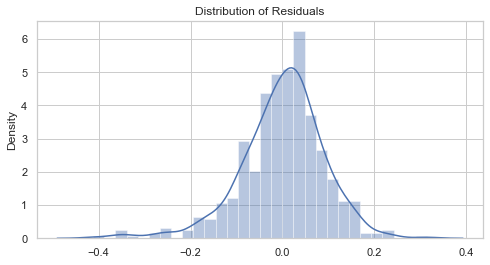

In [59]:
plt.figure(figsize=(8,4))
sns.distplot(residual)
plt.title('Distribution of Residuals')
plt.show()

In order to make valid inferences from our regression, the residuals of the regression should follow a normal distribution.Our distribution plot for residuals show normal distribution.

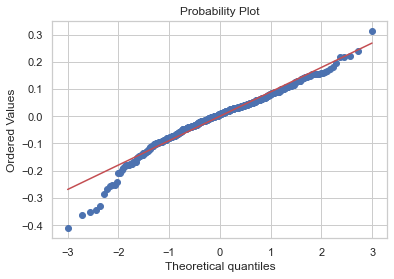

In [138]:
stats.probplot(residual, dist="norm", plot=pylab)
pylab.show()

Above is the q-q plot for the residual(error terms)

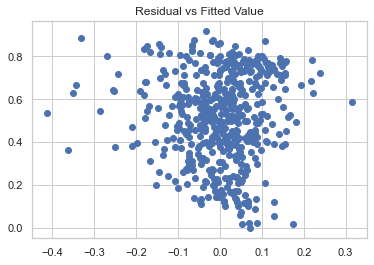

In [60]:
plt.scatter(residual,y_pred_m6)
plt.title('Residual vs Fitted Value')
plt.show()

As we can see the above image there is no certain pattern in the residuals hence the assumption of Homoscedasticity is true

####  Step 5 - Predictions & Evaluation on the Test Data 

To make predictions on test data first we need to perform all those steps we performed on train data
* We will scale the numeric variables
* We will drop all those variables which were insignificant for our linear model 6

In [61]:
# scaling the numeric variables in test data using the scaler function from the train data to transform the test data
numericVars = ['temp', 'humidity', 'windspeed', 'count']

df_test[numericVars] = scaler.transform(df_test[numericVars])

In [62]:
#preparing X_test and y_test simillarly we did for X_train and y_train
y_test = df_test.pop('count')
X_test = df_test

In [63]:
#columns are all the columns which RFE suggested to us
X_test = X_test[columns]

In [64]:
#Dropped all those variables which are not present in Linear Model 6
X_test = X_test.drop(columns = ['humidity' , 'July' , 'holiday' , 'spring' , 'Monday'] , axis = 1)

In [65]:
X_test_sm = sm.add_constant(X_test) #adding a constant

In [66]:
X_test.shape

(220, 10)

In [67]:
y_test_pred = linearModel_6.predict(X_test_sm) #Prediction on test data using linear model 6

In [73]:
r2 = r2_score(y_true = y_test , y_pred = y_test_pred)
print('R-Squared for test data :',r2)

R-Squared for test data : 0.7961390438459766


In [74]:
MSE = mean_squared_error(y_true = y_test , y_pred = y_test_pred)
print('Mean Squared Error for test data :',MSE)

Mean Squared Error for test data : 0.00974746473820747


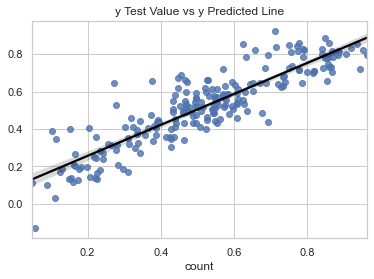

In [75]:
sns.regplot(x = y_test , y = y_test_pred , line_kws={'color' : 'black'})
plt.title('y Test Value vs y Predicted Line')
plt.show()

In [78]:
adjusted_r2 = 1-(1-r2)*(220-1)/(220-10-1)
print('Adjusted R-squared for test data :',adjusted_r2)

Adjusted R-squared for test data : 0.7863849311113343


* Lets see the summary of train and test 
* R-squared for train is 83.5 and test is 79.6, difference is not more than 5%. Hence it is good
* Adjusted R-squared is for train is 83.2 and for the test is 78.6
* The mean square error is 0.0097 for the test data
* Prob (F-statistic) for Linear Model 6 is 3.13e-188 which is approximately 0 and this tells us the overall significance of the model ie probability of Null hypothesis for the model to be true which is approx 0

In [79]:
round(linearModel_6.params , 3) # these are all the variables with coefficents of our linear model 6 

const                                 0.075
year                                  0.233
workingday                            0.056
temp                                  0.550
windspeed                            -0.155
Sep                                   0.097
Sunday                                0.068
Light Rain/Snow & Scattered clouds   -0.287
Mist & Cloudy                        -0.080
summer                                0.089
winter                                0.131
dtype: float64

y = c + mx

###### y(count) = 0.075 + 0.233 x year + 0.056 x workingday + 0.550 x temp - 0.155 x windspeed + 0.097 x Sep + 0.068 x Sunday - 0.287 x Light Rain/Snow & Scattered clouds - 0.080 x Mist & Cloudy + 0.089 x summer + 0.131 x winter

* This is the linear model 6 equation of the best line
* Interpretation of this line means that a unit increase in an independent variable keeping all other constant will increase/decrease the dependent variable by its coefficient value.
* Example if there is a unit increase in 'year' keeping rest of the variables constant then the count of bike sharing will increase by 0.233, simillarly if there is a unit increase in 'windspeed' keeping rest of the variables constant then the count of bike sharing will decrease by 0.155